In [1]:
from lazypredict.Supervised import LazyClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import *
import pickle
from joblib import dump
import shap
from category_encoders import TargetEncoder

# Inicio

In [2]:
df=pd.read_csv("..\data\online_gaming_behavior_dataset.csv")
df.columns

Index(['PlayerID', 'Age', 'Gender', 'Location', 'GameGenre', 'PlayTimeHours',
       'InGamePurchases', 'GameDifficulty', 'SessionsPerWeek',
       'AvgSessionDurationMinutes', 'PlayerLevel', 'AchievementsUnlocked',
       'EngagementLevel'],
      dtype='object')

In [3]:
df['EngagementLevel'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

# Valores duplicados

In [4]:
print("El total de duplicados es ",df.duplicated().sum())

El total de duplicados es  0


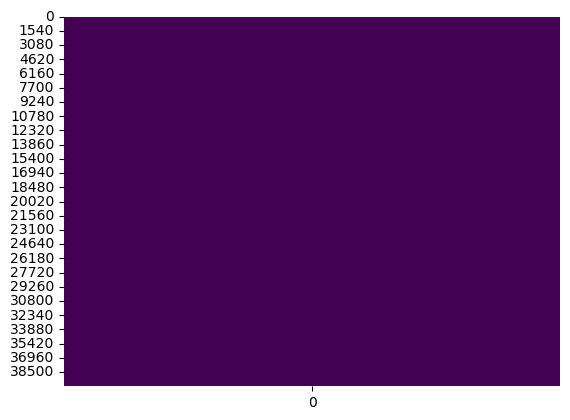

In [5]:
sns.heatmap(df.duplicated().values.reshape(-1, 1),cbar=False,cmap="viridis",)
plt.show()

# Análisis descriptivo

In [6]:
columnas_eliminar=['PlayerID']

In [7]:
df.drop(columnas_eliminar,axis=1,inplace=True)

In [8]:
df.head(3)

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.27,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.53,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.22,0,Easy,16,142,35,41,High


In [9]:
df["EngagementLevel"].value_counts()

EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64

In [10]:
df.describe()

,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.00,40034.00,40034.00,40034.00,40034.00,40034.00,40034.00
mean,31.99,12.02,0.20,9.47,94.79,49.66,24.53
std,10.04,6.91,0.40,5.76,49.01,28.59,14.43
min,15.00,0.00,0.00,0.00,10.00,1.00,0.00
25%,23.00,6.07,0.00,4.00,52.00,25.00,12.00
50%,32.00,12.01,0.00,9.00,95.00,49.00,25.00
75%,41.00,17.96,0.00,14.00,137.00,74.00,37.00
max,49.00,24.00,1.00,19.00,179.00,99.00,49.00


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
 11  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.7+ MB


# Valores nulos

In [12]:
df.isna().sum()

Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

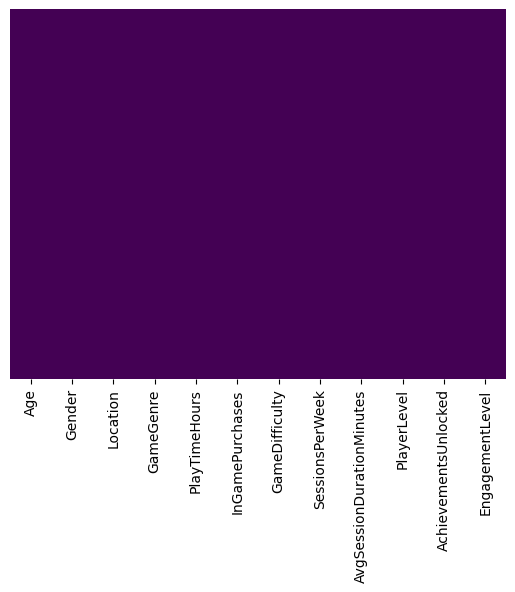

In [13]:
sns.heatmap(df.isnull(),cbar=False,cmap="viridis",yticklabels=False)
plt.show()

# Tratamiento de datos categóricos

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   Gender                     40034 non-null  object 
 2   Location                   40034 non-null  object 
 3   GameGenre                  40034 non-null  object 
 4   PlayTimeHours              40034 non-null  float64
 5   InGamePurchases            40034 non-null  int64  
 6   GameDifficulty             40034 non-null  object 
 7   SessionsPerWeek            40034 non-null  int64  
 8   AvgSessionDurationMinutes  40034 non-null  int64  
 9   PlayerLevel                40034 non-null  int64  
 10  AchievementsUnlocked       40034 non-null  int64  
 11  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 3.7+ MB


In [15]:
"""
 1   Gender                     OH
 2   Location                   Target
 3   GameGenre                  Target
  6   GameDifficulty             .map
  11  EngagementLevel            .map
"""

'\n 1   Gender                     OH\n 2   Location                   Target\n 3   GameGenre                  Target\n  6   GameDifficulty             .map\n  11  EngagementLevel            .map\n'

## Ordinal Encoder

In [16]:
df["GameDifficulty"]=df["GameDifficulty"].map({"Easy":0,"Medium":1,"Hard":2})
df["EngagementLevel"]=df["EngagementLevel"].map({"Low":0,"Medium":1,"High":2})

In [17]:
df.head(3)

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.27,0,1,6,108,79,25,1
1,29,Female,USA,Strategy,5.53,0,1,5,144,11,10,1
2,22,Female,USA,Sports,8.22,0,0,16,142,35,41,2


## Target encoder

In [18]:
from category_encoders import TargetEncoder

In [19]:
target_encoder=TargetEncoder(cols=["Location","GameGenre"])

In [20]:
df_sin_y=target_encoder.fit_transform(df.drop("EngagementLevel",axis=1),df["EngagementLevel"])

In [21]:
df_sin_y["EngagementLevel"]=df["EngagementLevel"]
df=df_sin_y

In [22]:
df

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,0.99,1.01,16.27,0,1,6,108,79,25,1
1,29,Female,1.00,1.01,5.53,0,1,5,144,11,10,1
2,22,Female,1.00,1.00,8.22,0,0,16,142,35,41,2
3,35,Male,1.00,1.00,5.27,1,0,9,85,57,47,1
4,33,Male,0.99,1.00,15.53,0,1,2,131,95,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,Male,1.00,1.01,20.62,0,0,4,75,85,14,1
40030,44,Female,0.99,1.00,13.54,0,2,19,114,71,27,2
40031,15,Female,1.00,0.99,0.24,1,0,10,176,29,1,2
40032,34,Male,1.00,1.00,14.02,1,1,3,128,70,10,1


## OH

In [23]:
Location=pd.get_dummies(df[['Location']],drop_first=True).astype(int)
Gender=pd.get_dummies(df[['Gender']],drop_first=True).astype(int)
conc=pd.concat([Location,Gender],axis=1)

In [24]:
df.drop(["Location","Gender"],axis=1,inplace=True)
df=pd.concat([df,conc],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        40034 non-null  int64  
 1   GameGenre                  40034 non-null  float64
 2   PlayTimeHours              40034 non-null  float64
 3   InGamePurchases            40034 non-null  int64  
 4   GameDifficulty             40034 non-null  int64  
 5   SessionsPerWeek            40034 non-null  int64  
 6   AvgSessionDurationMinutes  40034 non-null  int64  
 7   PlayerLevel                40034 non-null  int64  
 8   AchievementsUnlocked       40034 non-null  int64  
 9   EngagementLevel            40034 non-null  int64  
 10  Location                   40034 non-null  int64  
 11  Gender_Male                40034 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 3.7 MB


In [25]:
df

,Age,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Location,Gender_Male
0,43,1.01,16.27,0,1,6,108,79,25,1,0,1
1,29,1.01,5.53,0,1,5,144,11,10,1,1,0
2,22,1.00,8.22,0,0,16,142,35,41,2,1,0
3,35,1.00,5.27,1,0,9,85,57,47,1,1,1
4,33,1.00,15.53,0,1,2,131,95,37,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
40029,32,1.01,20.62,0,0,4,75,85,14,1,1,1
40030,44,1.00,13.54,0,2,19,114,71,27,2,0,0
40031,15,0.99,0.24,1,0,10,176,29,1,2,1,0
40032,34,1.00,14.02,1,1,3,128,70,10,1,1,1


# Division

In [26]:
X=df.drop("EngagementLevel",axis=1)
y=df["EngagementLevel"]

In [27]:
scaler=RobustScaler()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [29]:
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [30]:
print("Tamaño train: ",y_train.shape)
print("Tamaño test: ",y_test.shape)

Tamaño train:  (31226,)
Tamaño test:  (8808,)


In [31]:
df.columns

Index(['Age', 'GameGenre', 'PlayTimeHours', 'InGamePurchases',
       'GameDifficulty', 'SessionsPerWeek', 'AvgSessionDurationMinutes',
       'PlayerLevel', 'AchievementsUnlocked', 'EngagementLevel', 'Location',
       'Gender_Male'],
      dtype='object')

# Lazypredict

In [32]:
#from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier

In [33]:
lazy = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None,
                      classifiers=[
                          LogisticRegression,
        RandomForestClassifier,
        GradientBoostingClassifier,
        AdaBoostClassifier,
        KNeighborsClassifier,
        SVC,
        GaussianNB,
                      ])
models,predictions=lazy.fit(X_train_sc,X_test_sc,y_train,y_test)

  0%|          | 0/7 [00:00<?, ?it/s]

ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')


 29%|██▊       | 2/7 [00:03<00:09,  1.92s/it]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')


 43%|████▎     | 3/7 [00:13<00:21,  5.28s/it]

ROC AUC couldn't be calculated for GradientBoostingClassifier
multi_class must be in ('ovo', 'ovr')


 57%|█████▋    | 4/7 [00:14<00:10,  3.61s/it]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')


 71%|███████▏  | 5/7 [00:16<00:05,  2.83s/it]

ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')


100%|██████████| 7/7 [00:42<00:00,  6.07s/it]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.91,0.90,None,0.91,13.62
GradientBoostingClassifier,0.90,0.89,None,0.90,24.81
SVC,0.90,0.88,None,0.90,33.15
GaussianNB,0.84,0.81,None,0.84,0.06
LogisticRegression,0.82,0.80,None,0.82,0.50
AdaBoostClassifier,0.80,0.76,None,0.80,1.34
KNeighborsClassifier,0.75,0.73,None,0.75,2.16


# Calculo del modelo optimo

In [38]:
model=GradientBoostingClassifier()
model.fit(X_train_sc,y_train)

GradientBoostingClassifier()

In [39]:
y_pred=model.predict(X_test_sc)
y_pred_train=model.predict(X_train_sc)

# Metricas

In [40]:
print(classification_report(y_train,y_pred_train))
print("--------------------------------------")
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      8029
           1       0.91      0.95      0.93     15142
           2       0.92      0.88      0.90      8055

    accuracy                           0.91     31226
   macro avg       0.92      0.90      0.91     31226
weighted avg       0.91      0.91      0.91     31226

--------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      2295
           1       0.90      0.94      0.92      4232
           2       0.92      0.88      0.90      2281

    accuracy                           0.90      8808
   macro avg       0.91      0.89      0.90      8808
weighted avg       0.91      0.90      0.90      8808



In [42]:
print(confusion_matrix(y_train,y_pred_train))
print("--------------------------------------")
print(confusion_matrix(y_test,y_pred))

[[ 6979   817   233]
 [  348 14420   374]
 [  241   693  7121]]
--------------------------------------
[[1967  257   71]
 [ 120 3997  115]
 [  73  203 2005]]


# Exportar

In [81]:
dump(model, "model_videogame.pkl")

['model_videogame.pkl']

In [ ]:
dump(scaler, "scaler_x.pkl")

['scaler_x.pkl']

In [45]:
dump(target_encoder, "target_encoder_videogame.pkl")

['target_encoder_videogame.pkl']

In [46]:
dump(oh, "oh_encoder_videogame.pkl")

NameError: name 'oh' is not defined

# Shap

In [ ]:
explainer =shap.PermutationExplainer(model.predict_proba, X_train)

In [ ]:
shap_values = explainer.shap_values(X_test_sc)

PermutationExplainer explainer: 8809it [06:49, 21.20it/s]                          


In [ ]:
shap_values.shape

(8808, 11, 3)

In [ ]:
X_train.to_csv('X_train.csv', index=False)

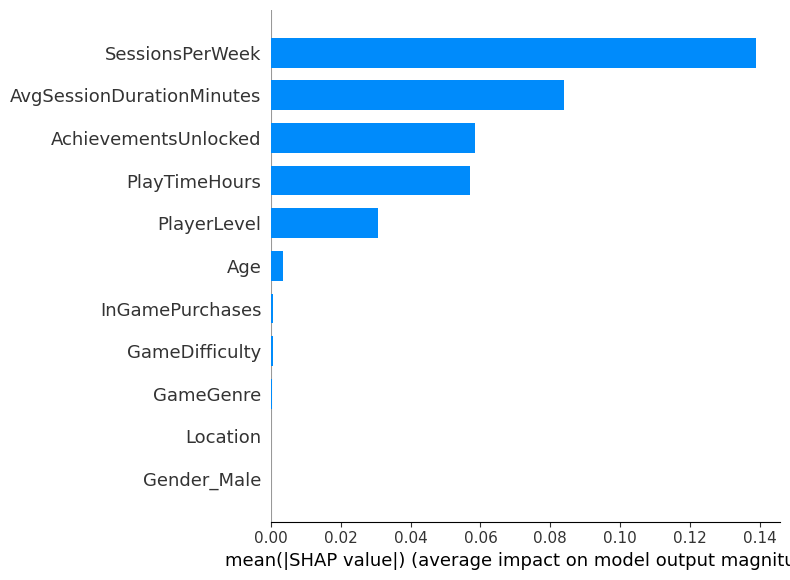

In [ ]:
shap.summary_plot(shap_values[:,:,0],X_test,plot_type="bar")

TIENES QUE CAMBIAR LAS DOS SIGUEINTES CELDAS A LA VEZ

In [ ]:
clase=1
expected_value= np.mean(model.predict_proba(X_train)[:, clase])

In [ ]:
obs_force = 2
shap.initjs()
shap.force_plot(expected_value, shap_values[obs_force,:,1], X_test.iloc[obs_force, :])
#                                          Si pones aqui la variable clase seria buena idea

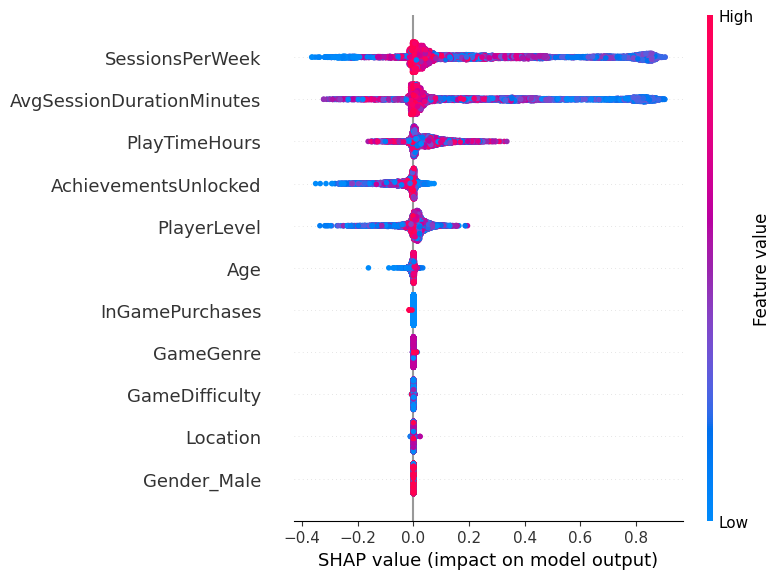

In [ ]:
shap.summary_plot(shap_values[:,:,1],X_test)

In [ ]:
dump(explainer, "explainer.pkl")

['explainer.pkl']

In [ ]:
dump(shap_values, "shap_values.pkl")

['shap_values.pkl']